## DATA SETUP

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import yt
import numpy as np
import matplotlib.pyplot as plt

from setup import data_setup
from gallifrey.utilities.math import calculate_pca
from gallifrey.particles import rotated_dataset

In [3]:
snapshot = 127
resolution = 4096
sim_id = "09_18"
dwarfs = True
save = False

In [4]:
ds, mw, stellar_model, imf, planet_model = data_setup(snapshot, resolution, sim_id, include_dwarfs=dwarfs)


      DETECTED LOCAL MACHINE: Test snapshot loaded.

yt : [INFO     ] 2023-06-15 16:03:33,447 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2023-06-15 16:03:33,506 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2023-06-15 16:03:33,506 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-15 16:03:33,507 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-06-15 16:03:33,508 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2023-06-15 16:03:33,508 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-06-15 16:03:33,508 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2023-06-15 16:03:33,508 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2023-06-15 16:03:33,509 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2023-06-15 16:03:33,509 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 202

## PLOT SETUP

In [5]:
from planet_maps import plot_maps
from planet_1dprofiles import plot_1dprofiles
from planet_2dprofiles import plot_2dprofiles

In [6]:
def _mass_weighted_planets(field, data):
    return data["stars","planets"]/data["stars","Masses"]
ds.add_field(("stars", "mass_weighted_planets"), function=_mass_weighted_planets, sampling_type="local", units="1/Msun")

def _star_weighted_planets(field, data):
    return data["stars","planets"]/data["stars","main_sequence_stars"]
ds.add_field(("stars", "star_weighted_planets"), function=_star_weighted_planets, sampling_type="local", units="")

## CREATE DATA SOURCE

In [7]:
radius = 60
normal_vector = calculate_pca(mw.sphere(radius=(10,"kpc"))["stars","Coordinates"]).components_[-1]

In [8]:
sphere_data = mw.sphere(radius=ds.quan(radius,"kpc"))
disk_data = rotated_dataset(mw.disk(radius=ds.quan(radius,"kpc"), height=ds.quan(0.5,"kpc"), normal=normal_vector), 
                            mw.centre(), normal_vector, [('stars','planets'), ('stars','mass_weighted_planets'), 
                                                         ("stars","star_weighted_planets"), ("stars","main_sequence_stars")])

yt : [INFO     ] 2023-06-15 16:03:40,108 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-06-15 16:03:40,109 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-15 16:03:40,110 Parameters: domain_left_edge          = [-53.69806519 -53.69806519 -53.69806519]
yt : [INFO     ] 2023-06-15 16:03:40,111 Parameters: domain_right_edge         = [51.66095168 51.66095168 51.66095168]
yt : [INFO     ] 2023-06-15 16:03:40,112 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-06-15 16:03:40,114 Allocating for 1.304e+05 particles


In [9]:
rotated_data = rotated_dataset(sphere_data, mw.centre(), normal_vector, [('stars','planets'), ('stars','mass_weighted_planets'), ("stars","star_weighted_planets")])

yt : [INFO     ] 2023-06-15 16:03:41,646 Parameters: current_time              = 0.0
yt : [INFO     ] 2023-06-15 16:03:41,647 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2023-06-15 16:03:41,648 Parameters: domain_left_edge          = [-58.64838778 -58.64838778 -58.64838778]
yt : [INFO     ] 2023-06-15 16:03:41,649 Parameters: domain_right_edge         = [58.67914424 58.67914424 58.67914424]
yt : [INFO     ] 2023-06-15 16:03:41,650 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2023-06-15 16:03:41,651 Allocating for 3.454e+05 particles


## FACE-ON MAPS

yt : [INFO     ] 2023-06-15 16:03:41,875 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-06-15 16:03:41,876 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-06-15 16:03:41,876 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-06-15 16:03:41,877 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-06-15 16:03:41,879 Splatting (('stars', 'planets')) onto a 800 by 800 mesh using method 'cic'



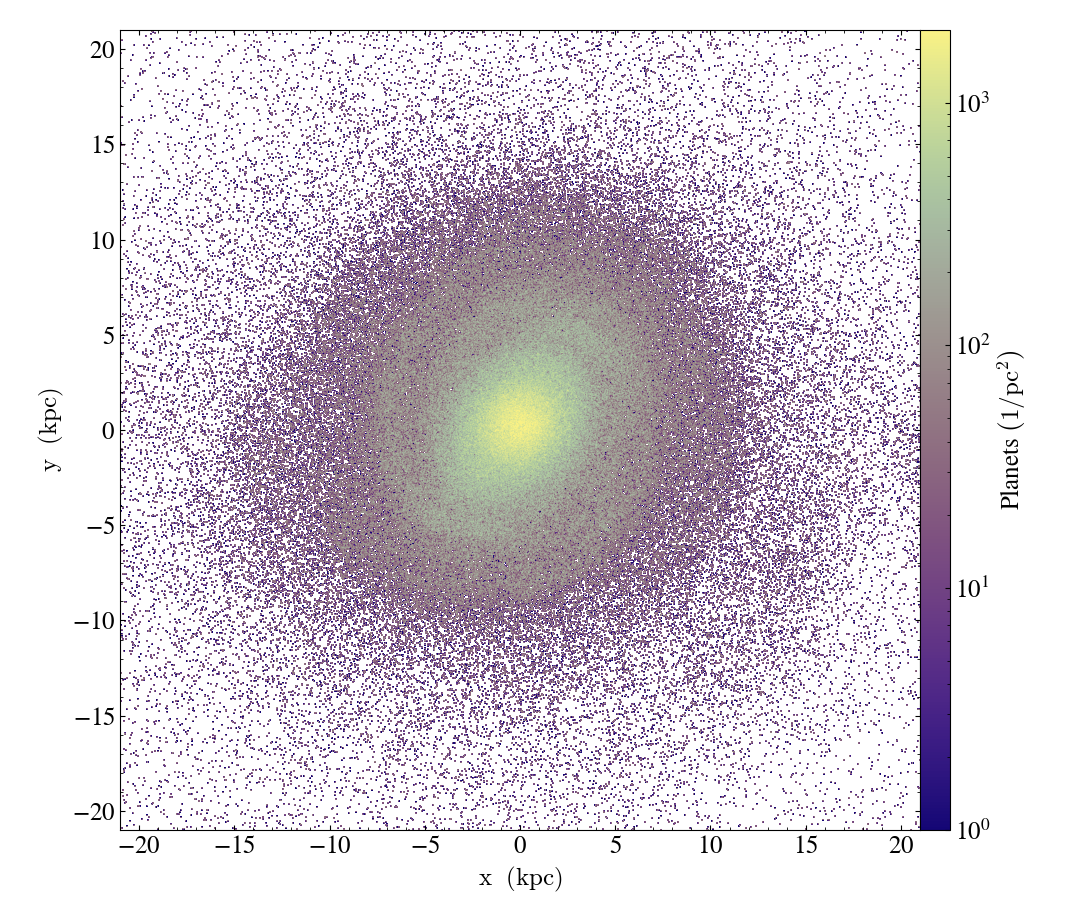

yt : [INFO     ] 2023-06-15 16:03:43,000 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-06-15 16:03:43,001 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-06-15 16:03:43,003 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-06-15 16:03:43,004 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-06-15 16:03:43,005 Splatting (('stars', 'mass_weighted_planets')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-06-15 16:03:43,205 Splatting (('stars', 'star_weighted_planets')) onto a 800 by 800 mesh using method 'cic'



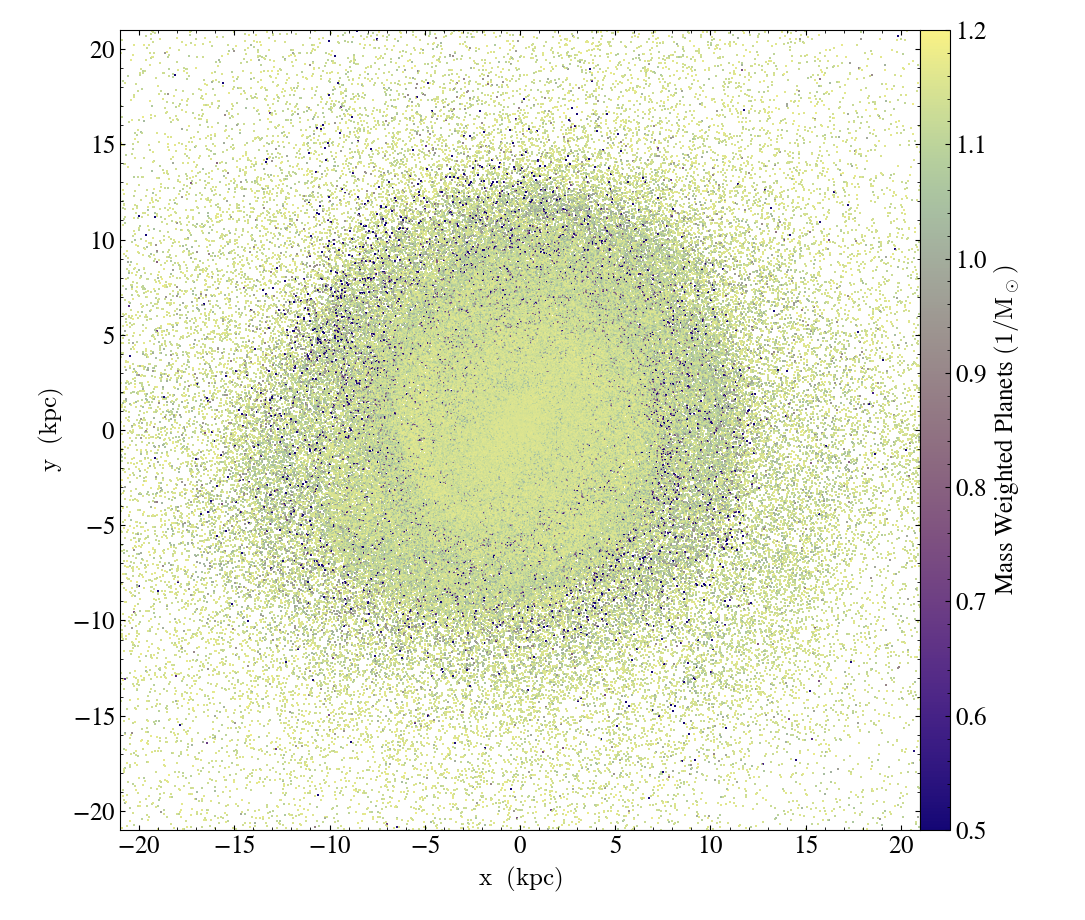
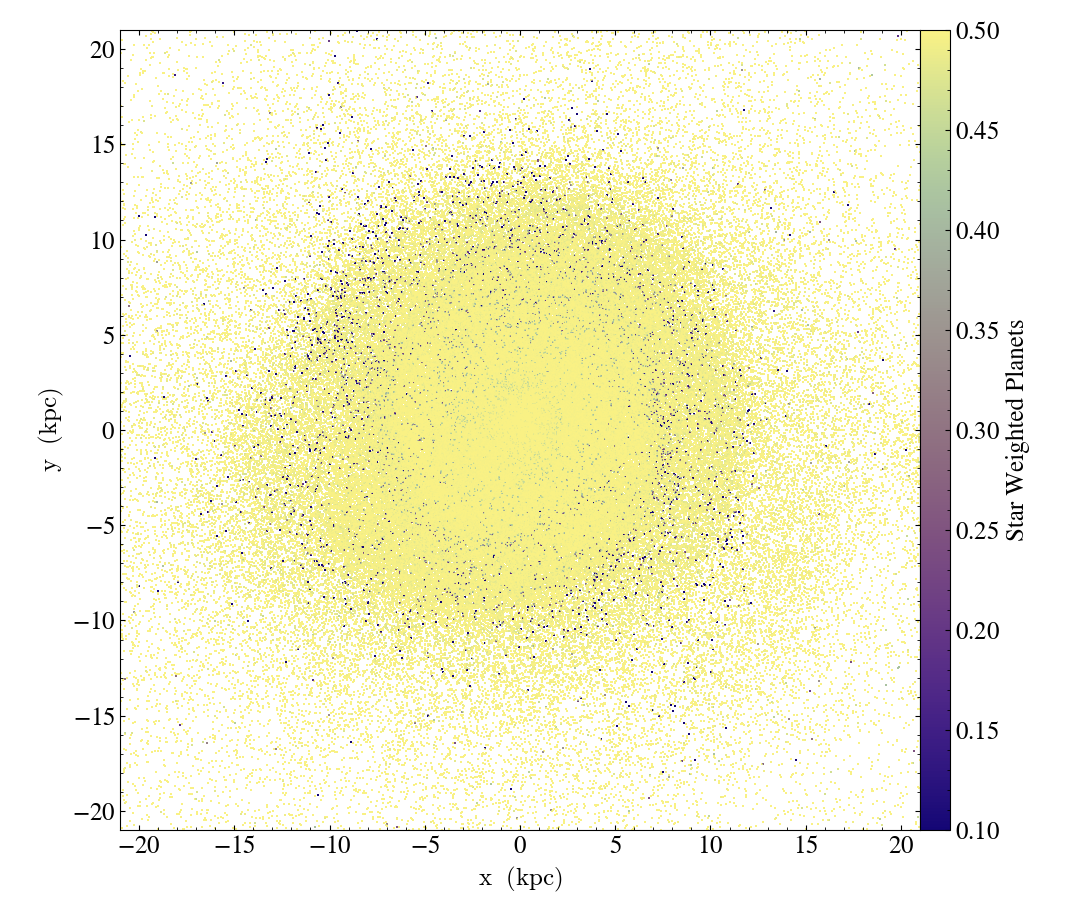

In [10]:
zplot, zplots = plot_maps(rotated_data, axis='z', save=save)

## SIDE-ON MAPS

yt : [INFO     ] 2023-06-15 16:03:44,122 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-06-15 16:03:44,123 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-06-15 16:03:44,124 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-06-15 16:03:44,124 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-06-15 16:03:44,126 Splatting (('stars', 'planets')) onto a 800 by 800 mesh using method 'cic'



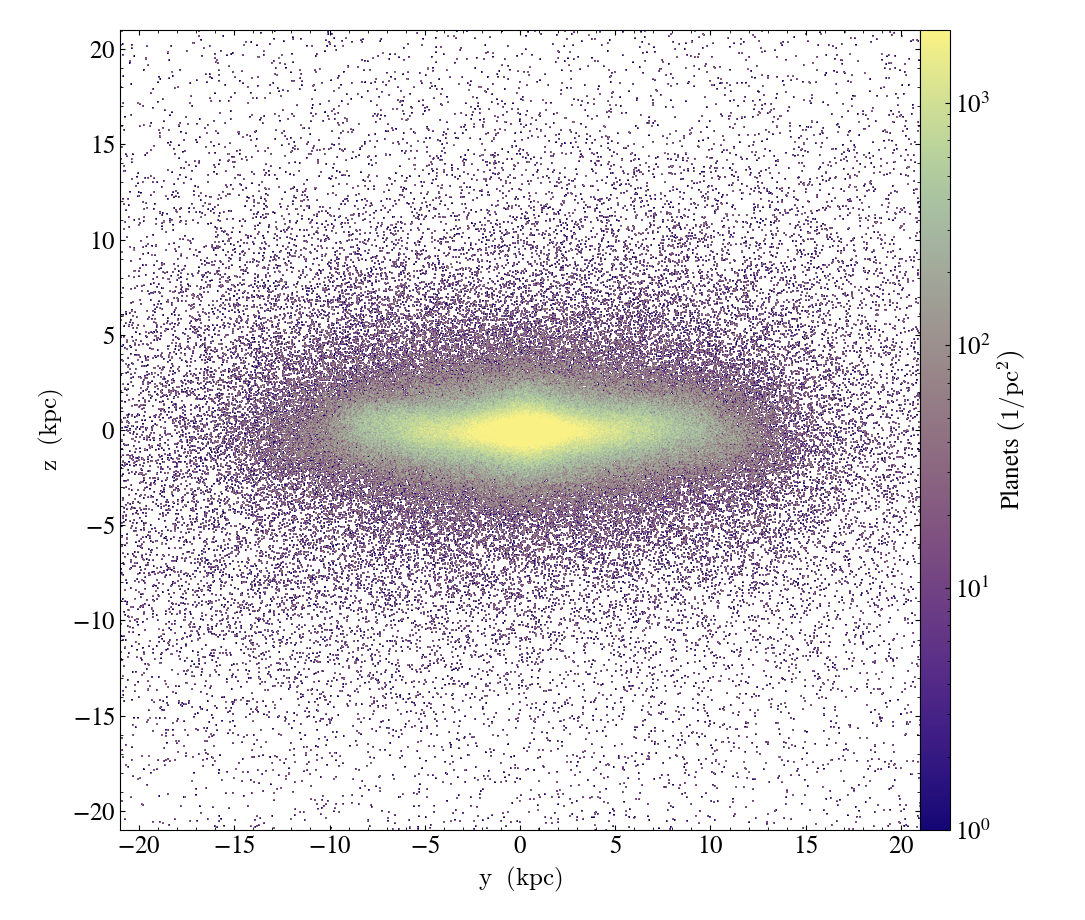

yt : [INFO     ] 2023-06-15 16:03:44,855 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-06-15 16:03:44,856 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-06-15 16:03:44,856 xlim = -20.984622 21.015378
yt : [INFO     ] 2023-06-15 16:03:44,857 ylim = -20.984622 21.015378
yt : [INFO     ] 2023-06-15 16:03:44,858 Splatting (('stars', 'mass_weighted_planets')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2023-06-15 16:03:45,050 Splatting (('stars', 'star_weighted_planets')) onto a 800 by 800 mesh using method 'cic'



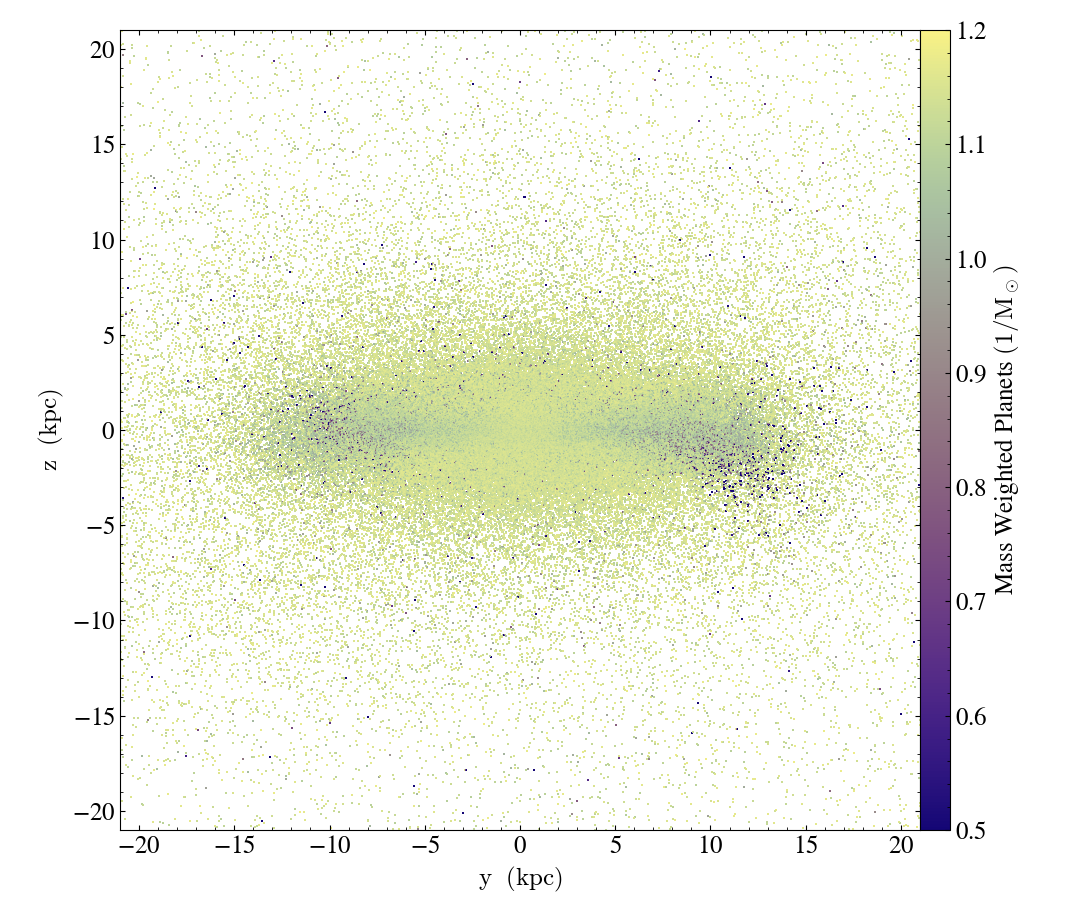
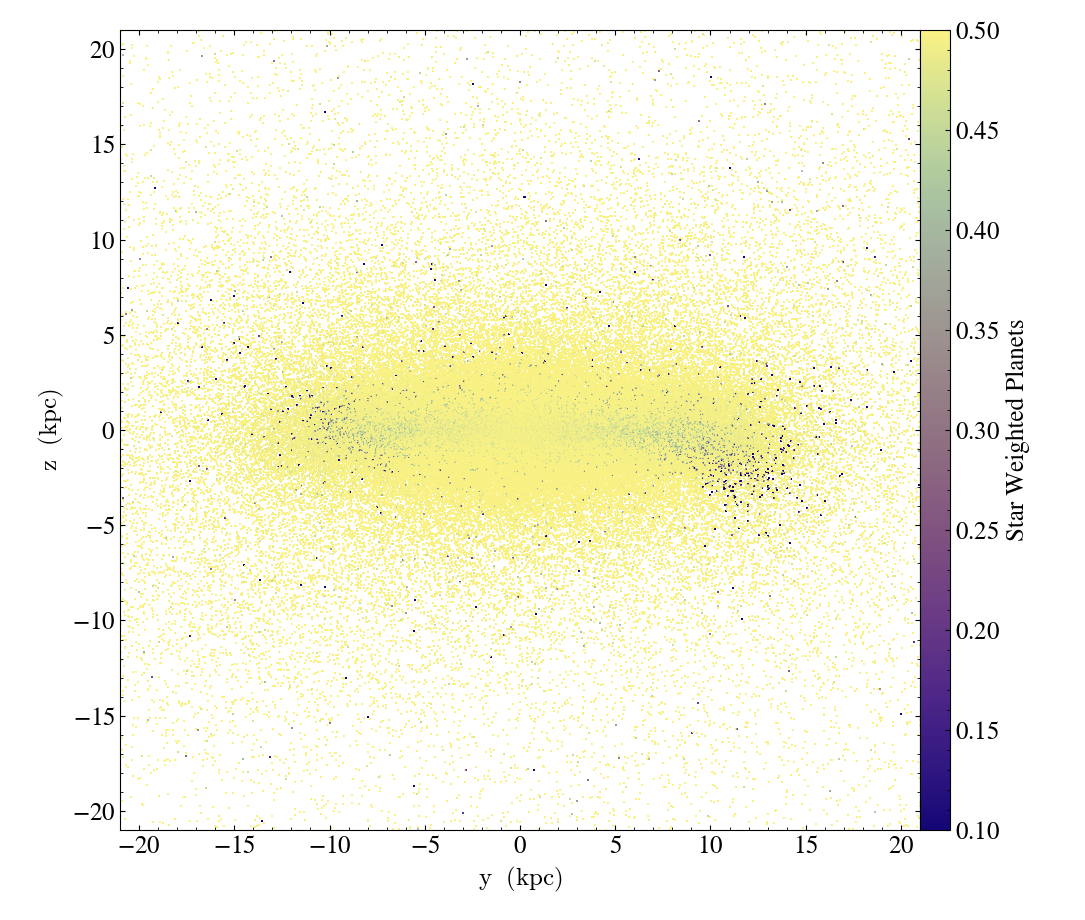

In [11]:
yplot, yplots = plot_maps(rotated_data, axis='x', save=save)

## 1D Profiles

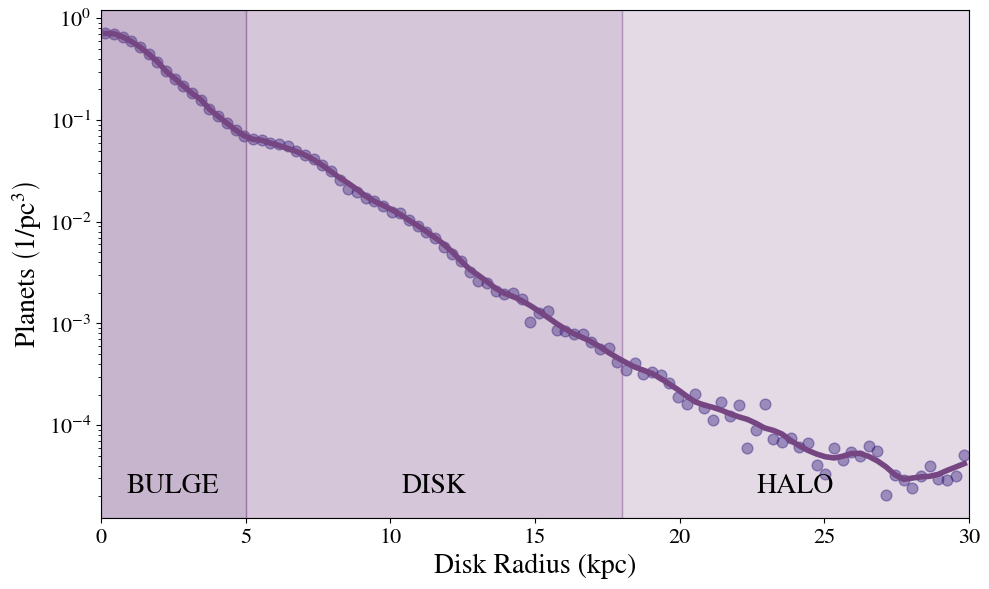

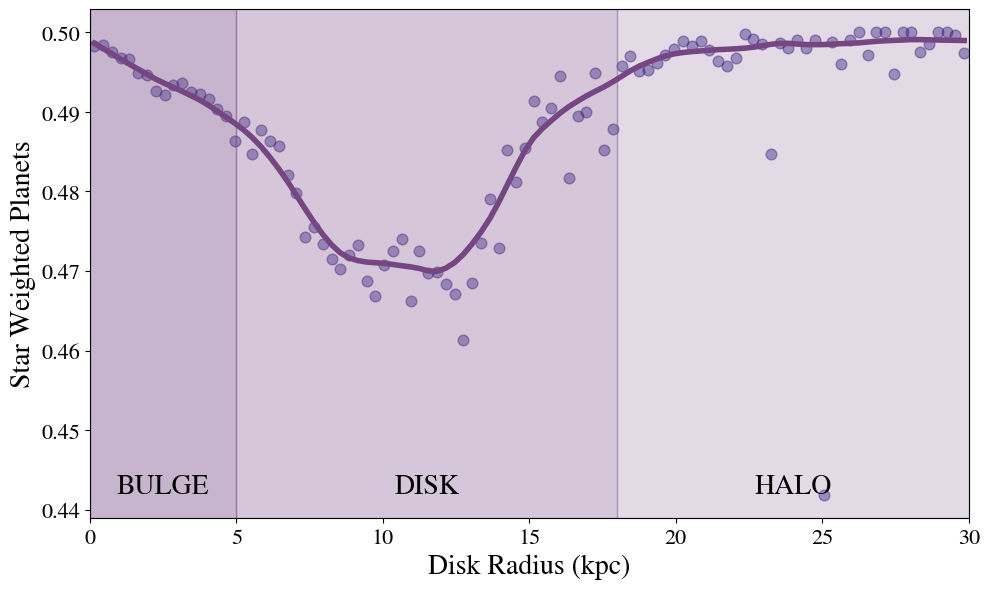

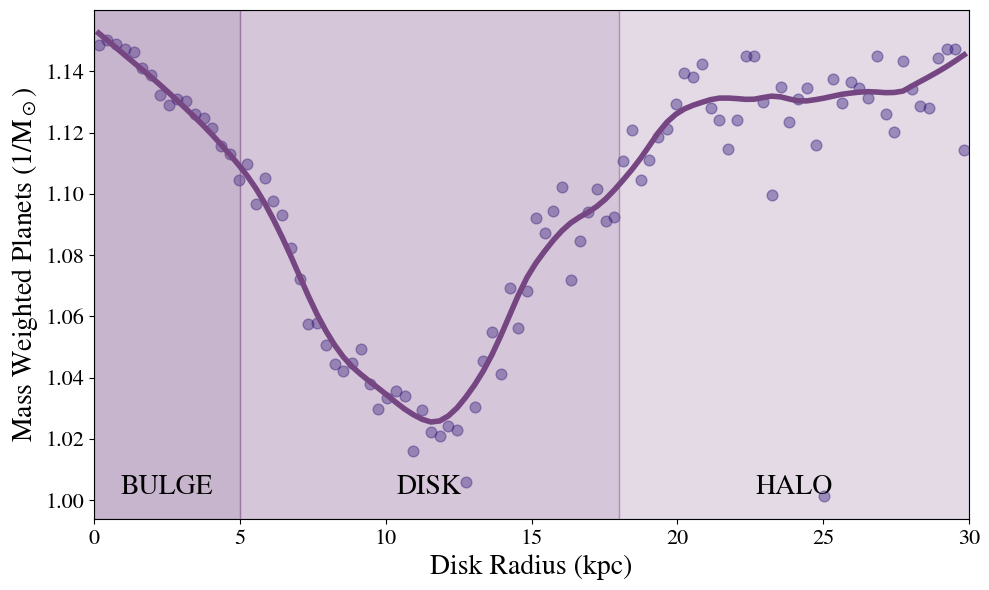

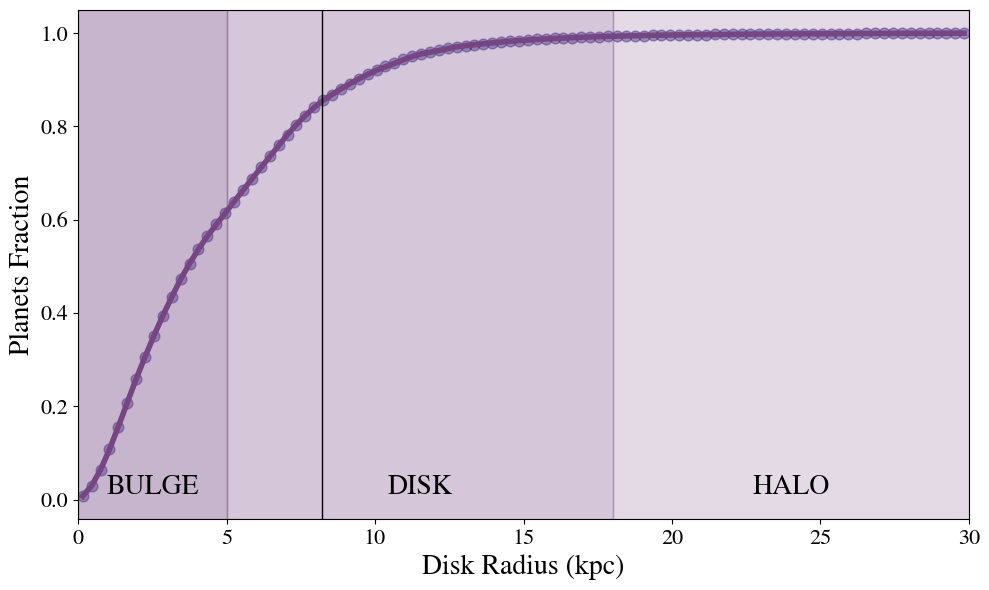

In [12]:
figs, axes = plot_1dprofiles(disk_data.sphere([0,0,0], 30), halo=mw, disk_height=ds.quan(0.5,"kpc"), save=save)

## 2D Profiles


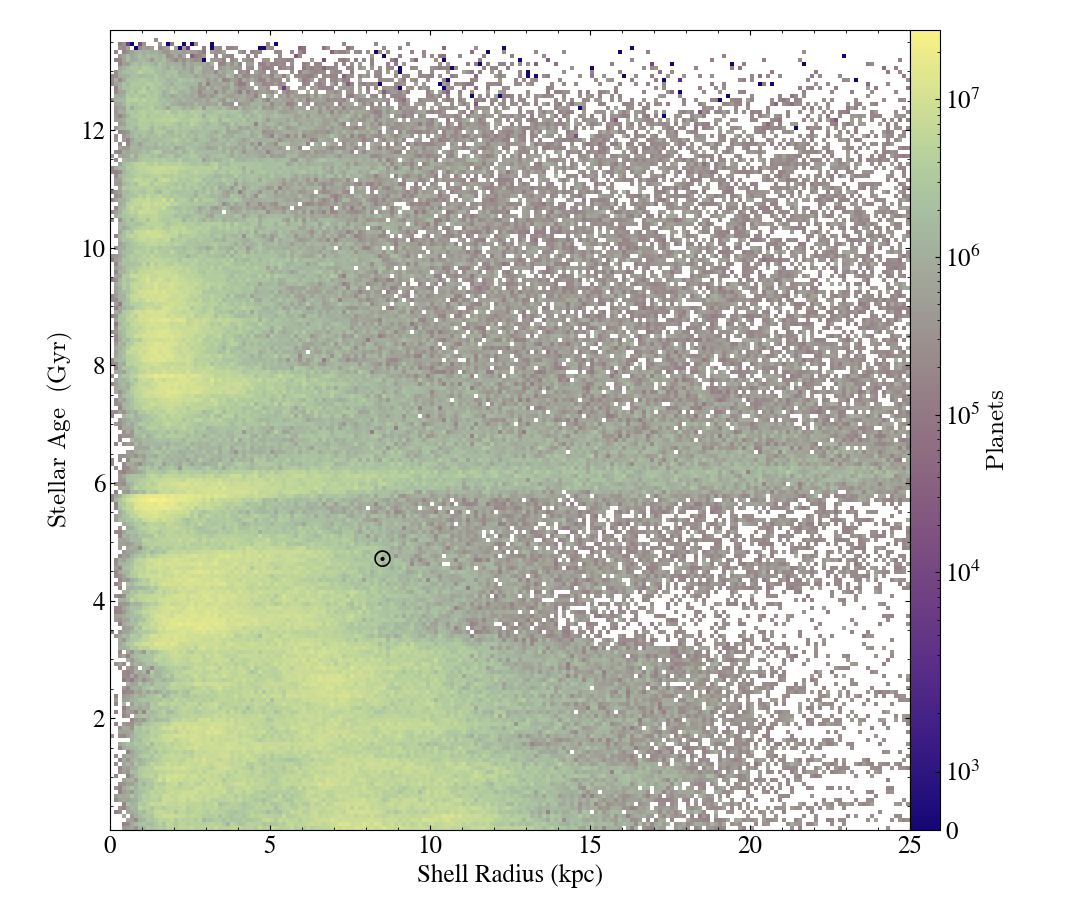


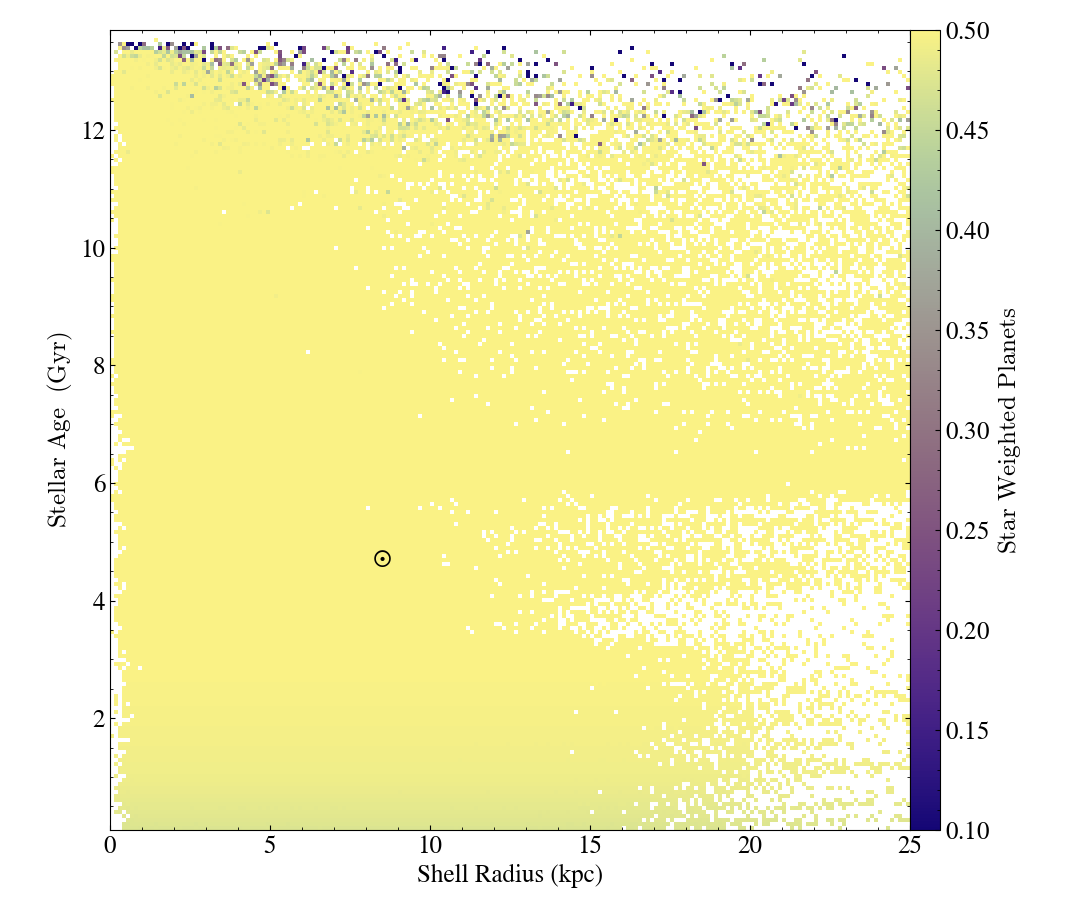


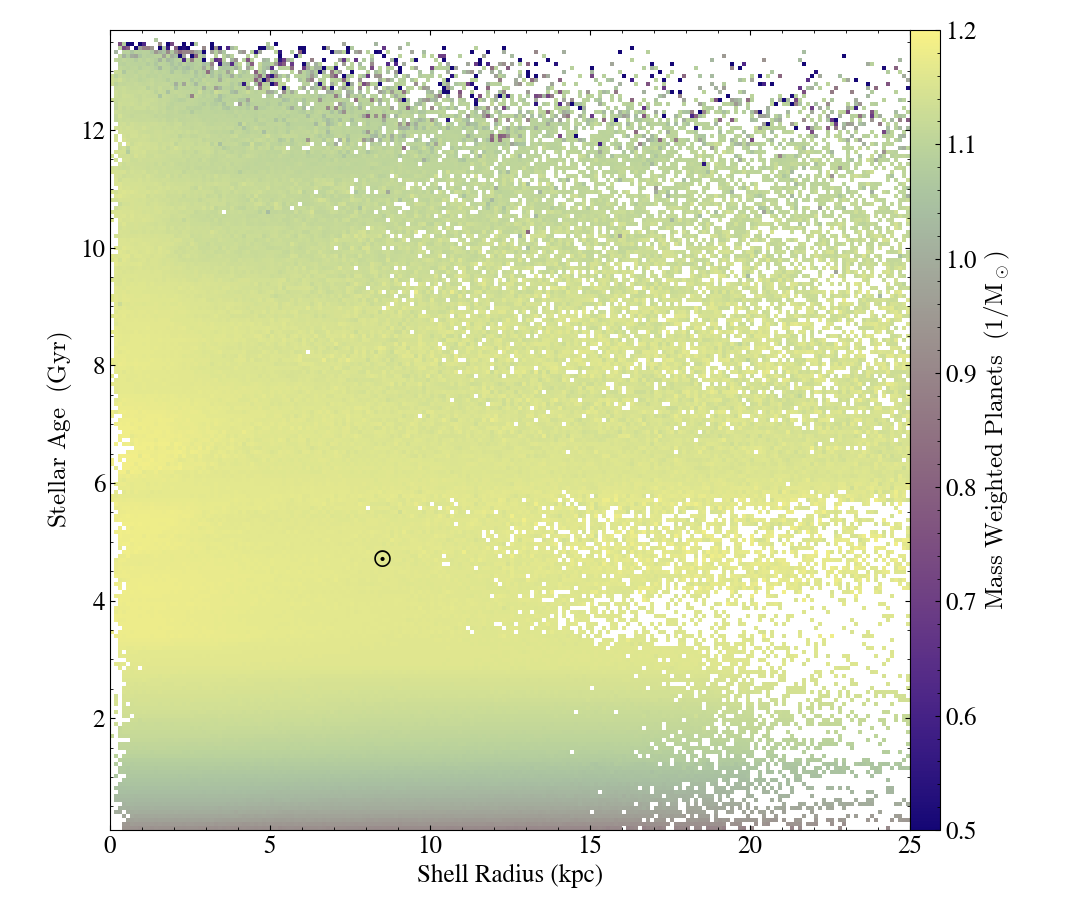

In [13]:
age_plots = plot_2dprofiles(sphere_data, "stellar_age", save=save)


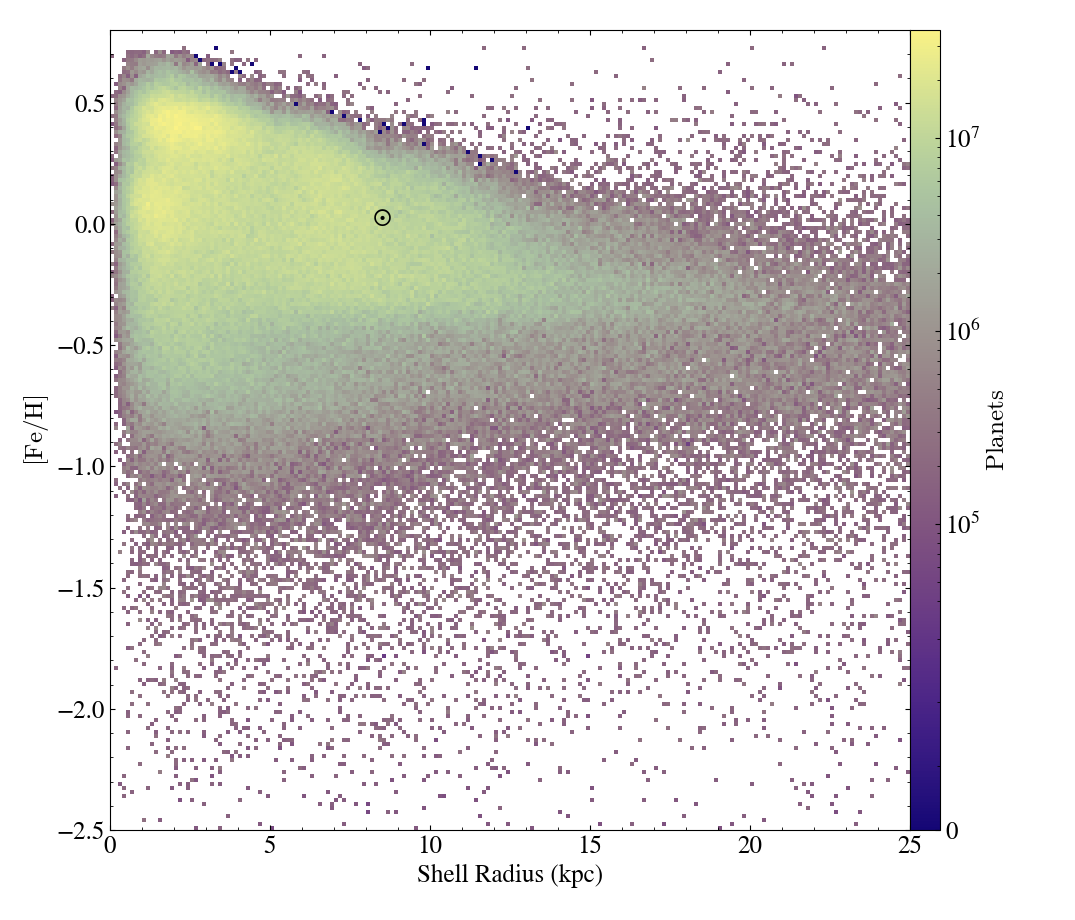


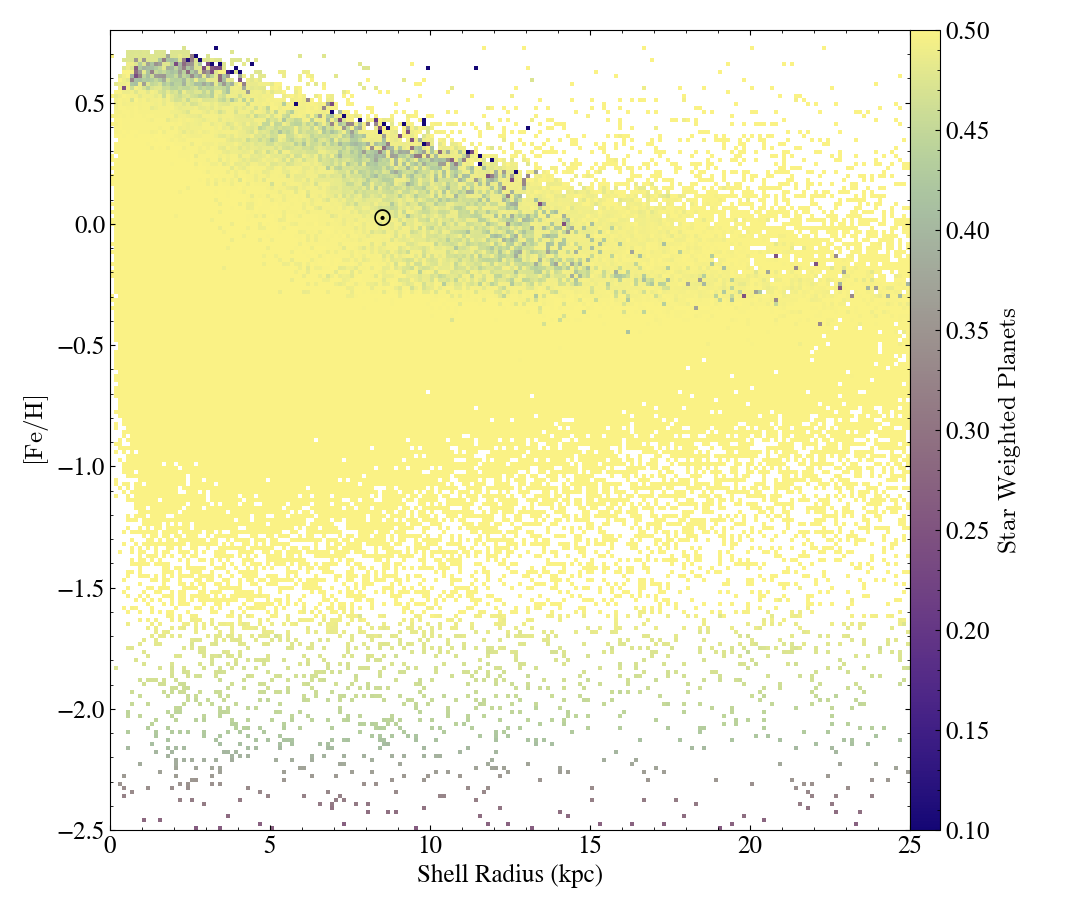


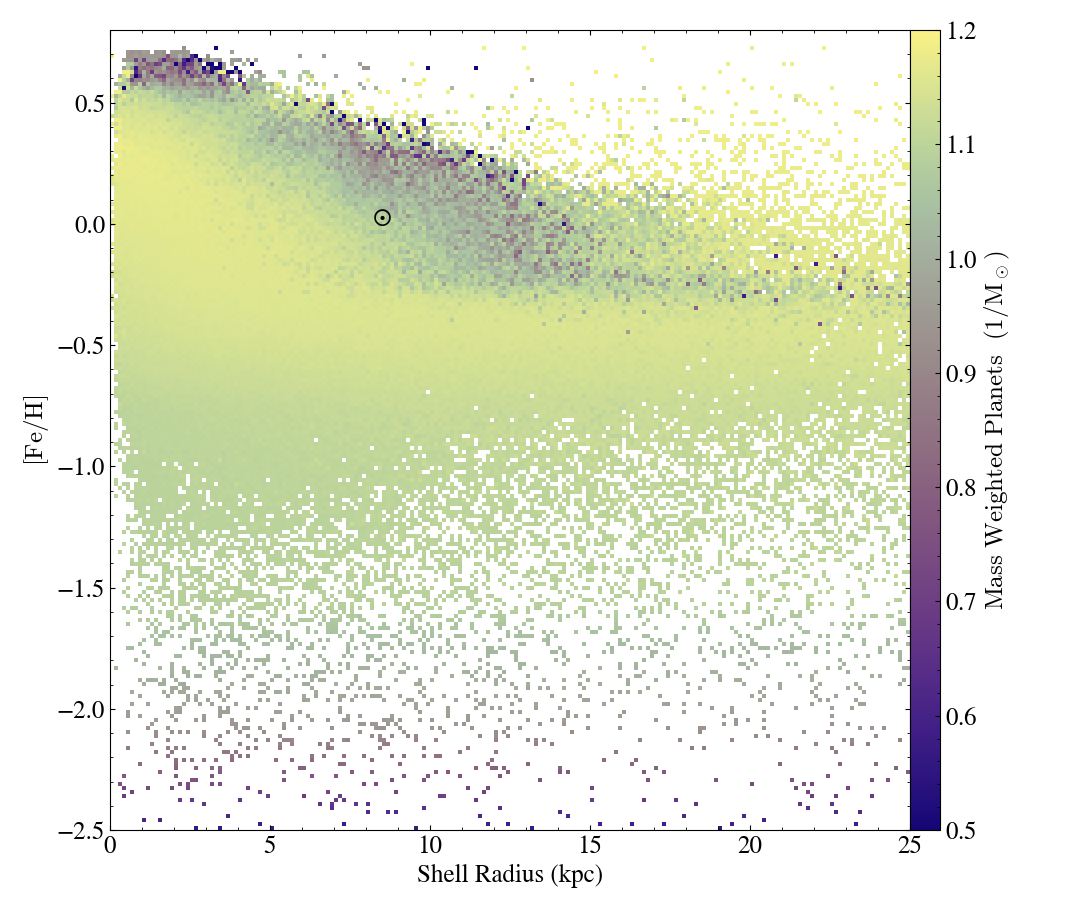

In [14]:
fe_plots = plot_2dprofiles(sphere_data, "metallicity", save=save)